In [1]:
#Heart Disease Prediction Using Random Forest

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
print("Libraries imported")


Libraries imported


In [28]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [29]:
df.count()

Unnamed: 0    303
Age           303
Sex           303
ChestPain     303
RestBP        303
Chol          303
Fbs           303
RestECG       303
MaxHR         303
ExAng         303
Oldpeak       303
Slope         303
Ca            299
Thal          301
AHD           303
dtype: int64

In [39]:
#Finding Null Instances
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          0
AHD           0
dtype: int64

In [ ]:
#Getting mean values of Ca according to sex i.e genderwise

df.groupby('Sex')['Ca'].mean()

In [41]:
#Substituing Null with Mean values
df['Ca']=df.groupby("Sex")['Ca'].transform(lambda x: x.fillna(x.mean()))
print("Null Ca values are replaced by mean values of female and male i.e genderwise")

Null Ca values are replaced by mean values of female and male i.e genderwise


In [42]:
#using label encoder converting non numeric cols to numeric

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['ChestPain']=le.fit_transform(df.ChestPain)
df['Thal']=le.fit_transform(df.Thal)
df['AHD']=le.fit_transform(df.AHD)

df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [43]:
X = df.drop('AHD',axis=1)

In [44]:
y = df['AHD']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.shape, X_test.shape

((242, 14), (61, 14))

In [46]:
#Inport Random Forest Classifier and fit the data
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=20, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=20)

In [50]:
from sklearn.metrics import accuracy_score

predictions_train = classifier_rf.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, predictions_train))

Train Accuracy:  0.9504132231404959


In [51]:
predictions_test = classifier_rf.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, predictions_test))

#our Test Accuracy is low as we don't have a large training set as random 
# forest requires large dataset to work properly

#Accuracy score of Train is more than Test so model is overfitting
#If accuracy score of train and test are low the model is underfitted

#Both are problametic
#underfit - can't fit to training nor new data
#overfit - can predict training data properly but not new data

#so we want a model that has a sweet spot between underfit and overfit
#we can achieve that by changing different factors
#1. Use a resampling technique to estimate model accuracy.
#2. Hold back a validation dataset.

Test Accuracy:  0.8852459016393442


In [53]:
#Hyperparameter tuning for Random Forest using GridSearchCV
#CV stands for cross - validations

rf = RandomForestClassifier(random_state=20, n_jobs=-1)
#n_jobs means number of jobs running parallely
#default is none, none means 1
#-1 means all parallel processors

#Here we are giving multiple values to 3 var
#And we will check with every given value how our model works
params= {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200] 
}

In [55]:
from sklearn.model_selection import GridSearchCV

#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Controls the verbosity: the higher, the more messages.
#1 : the computation time for each fold and parameter candidate is displayed;
#2 : the score is also displayed;
#3 : the fold and candidate parameter indexes are also displayed together 
#with the starting time of the computation.



Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=20),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [56]:
grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

#i.e It will give which were the best parameters from the one given

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=20)

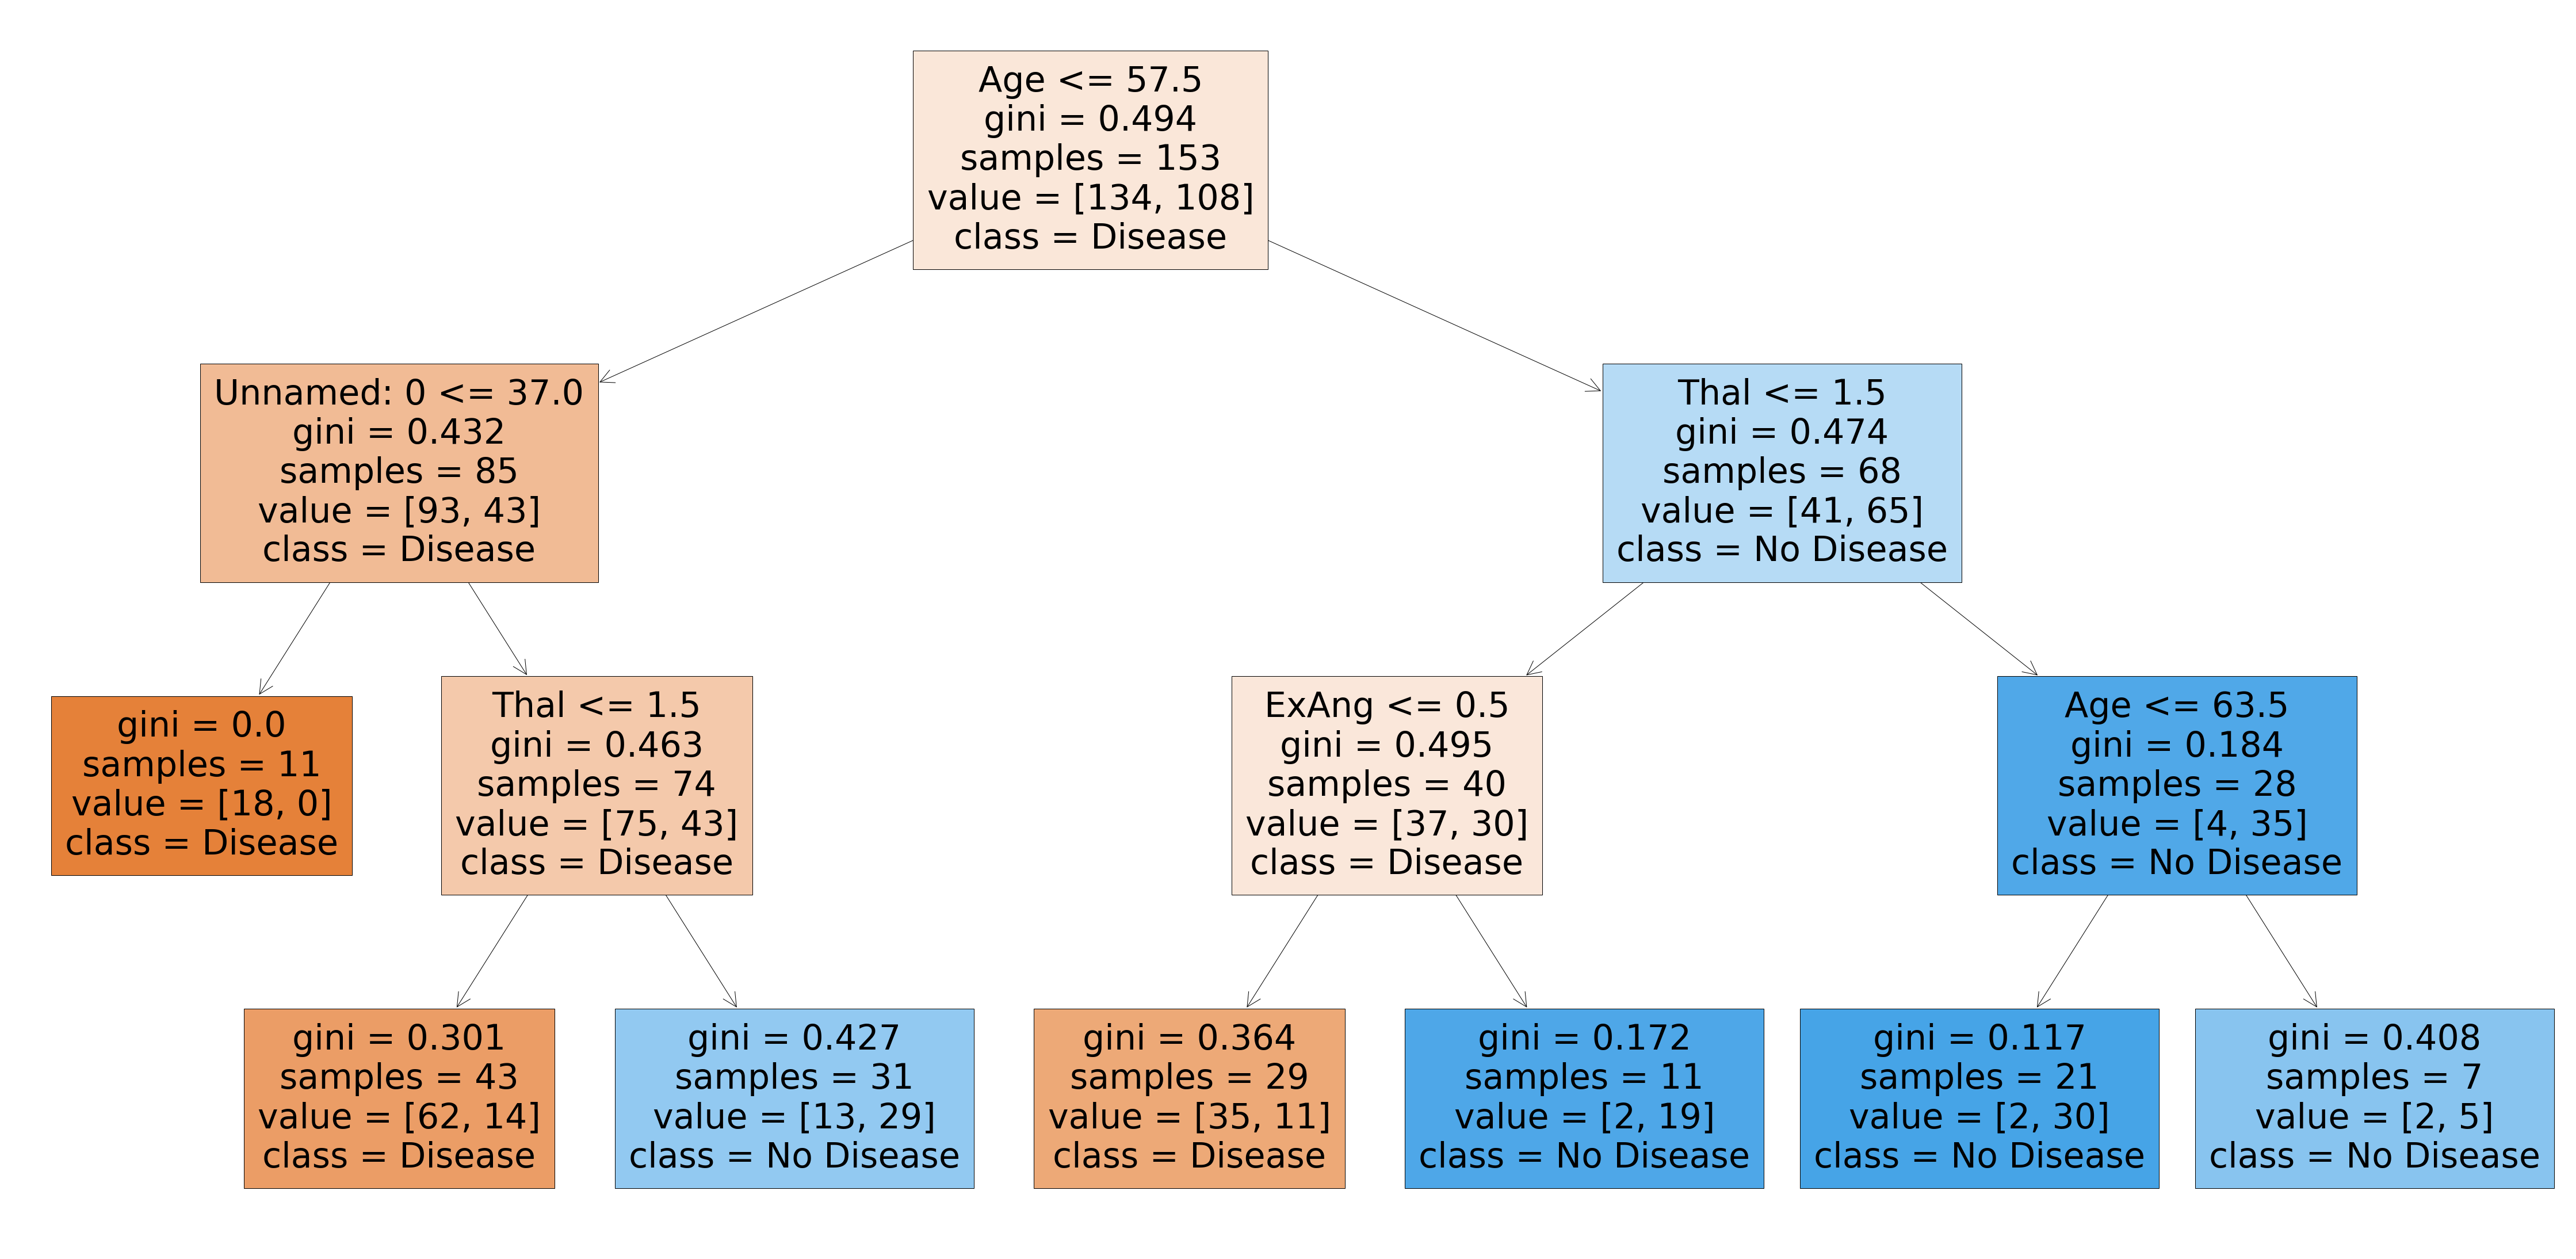

In [57]:
#Visualize RF
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[5], feature_names=X.columns, 
          class_names=['Disease', 'No Disease'], filled = True);

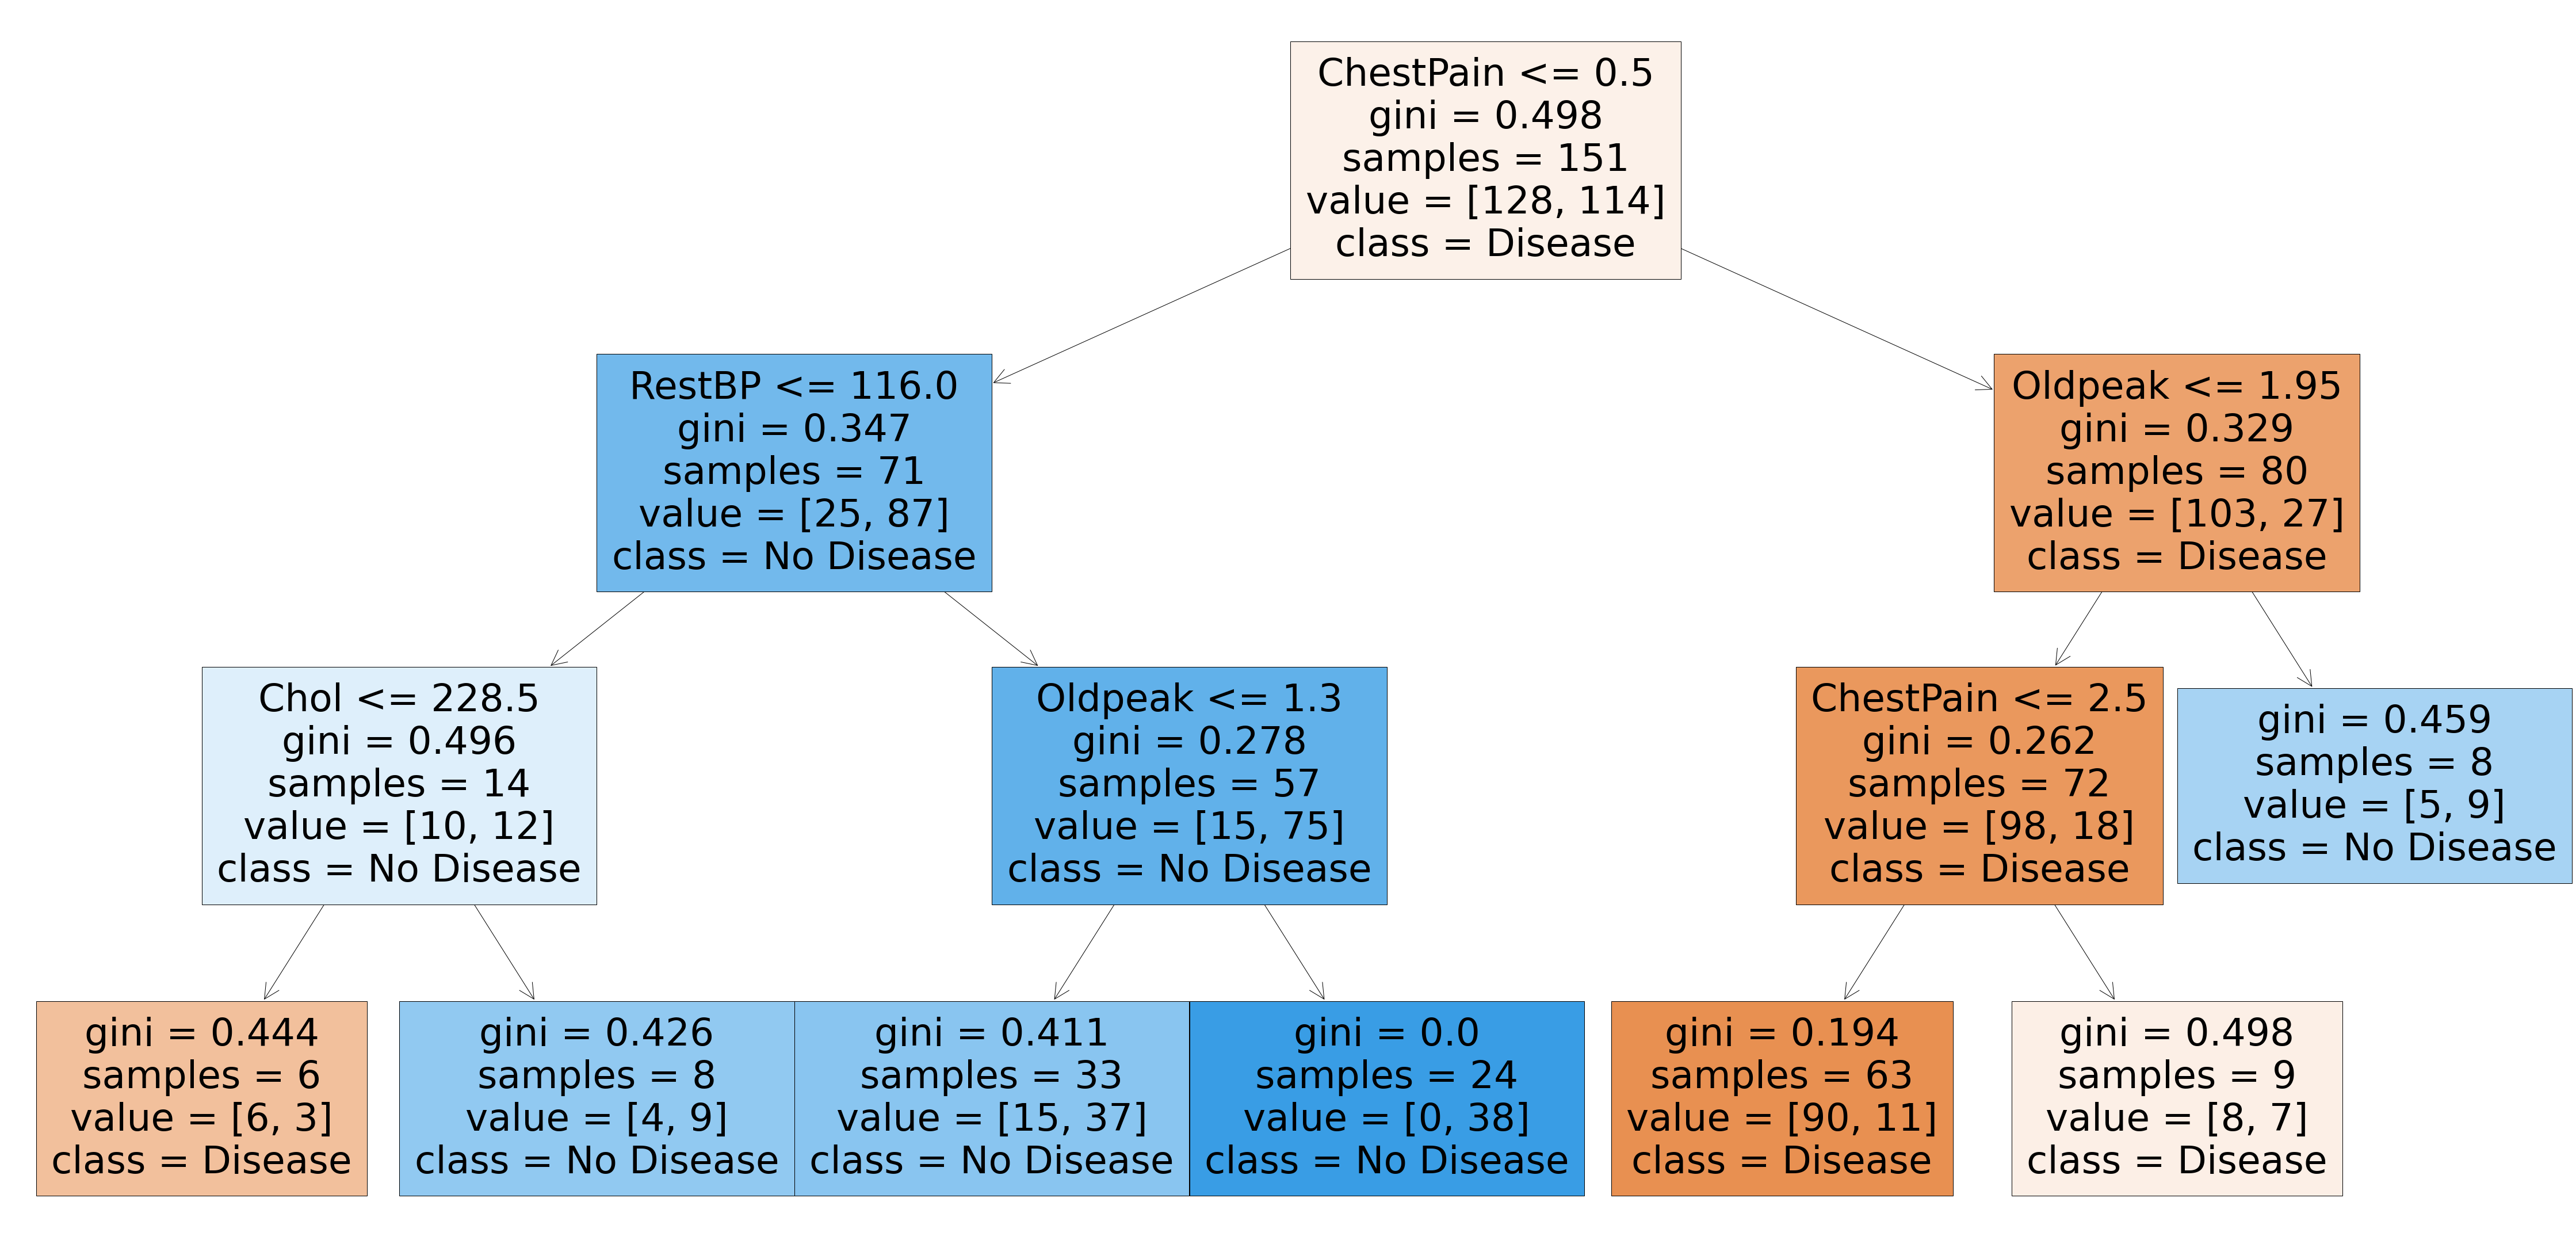

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[7], feature_names=X.columns, 
          class_names=['Disease', 'No Disease'], filled = True);

# the trees created by estimators [5] and estimators [7] are different
# means each tree is independent of the other

In [59]:
#Sort the data with the help of feature importance
rf_best.feature_importances_

array([0.02178311, 0.04009382, 0.03774038, 0.21177169, 0.01716344,
       0.02244188, 0.00317317, 0.01154854, 0.08590886, 0.14215916,
       0.09218883, 0.04632724, 0.15160372, 0.11609618])

In [62]:
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp': rf_best.feature_importances_
})

imp_df.sort_values(by='Imp', ascending=False)

#This gives importance of each feature in deciding the label(i.e heart disease or not)

,Varname,Imp
3,ChestPain,0.211772
12,Ca,0.151604
9,ExAng,0.142159
13,Thal,0.116096
10,Oldpeak,0.092189
8,MaxHR,0.085909
11,Slope,0.046327
1,Age,0.040094
2,Sex,0.037740
5,Chol,0.022442
